In [1]:
from datetime import datetime, date
from IPython.display import display

import numpy as np
import pandas as pd
import scipy.stats as stats
import rpy2

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#print(plt.style.available)
sns.set_context('talk')
sns.set(style="darkgrid", context="talk")
sns.set(color_codes=True)

#%load_ext rpy2.ipython
%matplotlib inline
#%matplotlib notebook

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dataset = pd.read_csv('./lab2.macroset.csv', parse_dates=['when'], date_parser=dateparse, encoding='utf8')

In [3]:
def satisfaction_fn(value):
    unsatisfaction_limit = 3
    return 'satisfied' if value >= unsatisfaction_limit else 'not_satisfied'
dataset.loc[:,'satisfaction'] = dataset.satisfactionLevel.apply(satisfaction_fn)
dataset.loc[:,'day'] = dataset['when'].dt.date
print( 'metricas recogidas: ', len(dataset) )
#dataset.drop_duplicates()
#print( 'metricas sin duplicados: ', len(dataset) )
dataset = dataset.sort_values(by=['when', 'screenName','satisfactionLevel'], ascending=[0, 1, 1])
dataset.head()

metricas recogidas:  729410


,browser,browserVersion,countryCode,device,flowType,message,os,osVersion,satisfactionLevel,screenName,site,uniqueIndex,when,windowHeight,windowWidth,satisfaction,day
718868,Chrome Mobile,67.0.6,br,phone,direct,Até agora todos os produtos chegaram certinho!,Android,6.0.1,3,singleShippingOptionsSelection,MLB,992514,2018-07-11 23:59:49,274,360,satisfied,2018-07-11
718869,Chrome Mobile,57.0.7,br,phone,direct,NaN,Android,7.1.1,4,congrats,MLB,992513,2018-07-11 23:59:46,336,592,satisfied,2018-07-11
718870,Chrome Mobile,67.0.6,br,phone,direct,NaN,Android,4.2.2,3,StoredCardinstallments,MLB,992512,2018-07-11 23:59:42,452,320,satisfied,2018-07-11
718871,Chrome Mobile,67.0.6,br,phone,direct,Já comprei e gostei muito bom,Android,7.1.1,3,newAddress,MLB,992511,2018-07-11 23:59:41,250,360,satisfied,2018-07-11
718872,Chrome Mobile,67.0.6,br,phone,direct,NaN,Android,7.0.0,4,userIdentification,MLB,992510,2018-07-11 23:59:40,560,360,satisfied,2018-07-11


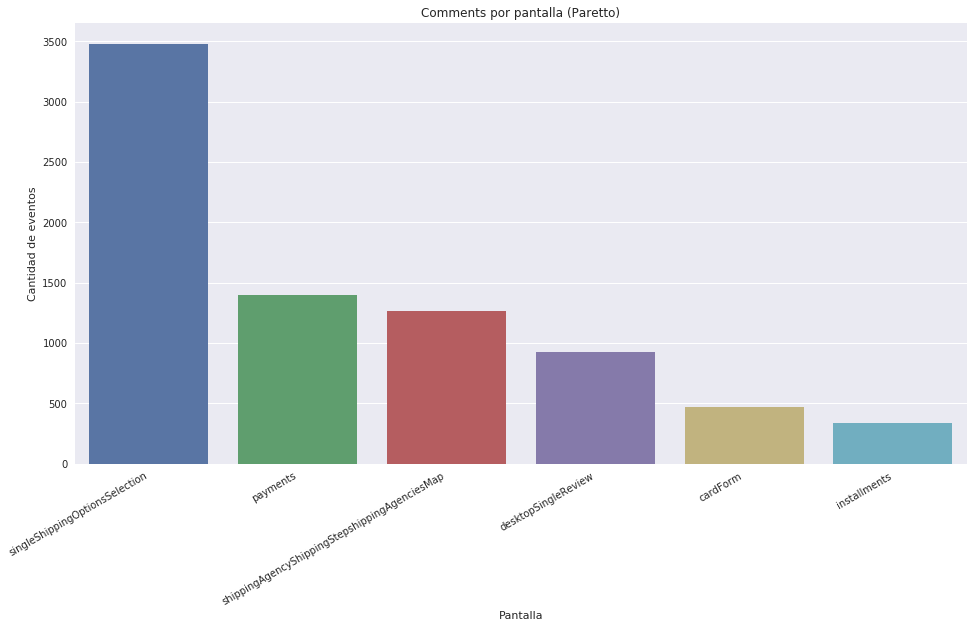

In [4]:
week_df = dataset[ (dataset['when'] >= '2018-05-25 00:00:00' ) & (dataset['when'] <= '2018-07-12 00:00:00' ) ]
dataframe = week_df.query(' device == "desktop" & site == "MLA" ')

frecuencies = pd.crosstab(
    index = dataframe["screenName"],  # Make a crosstab
    columns="count"                   # Name the count column
)

#display( frecuencies )
frecuencies = dataframe['screenName'].value_counts().to_frame().reset_index()
frecuencies = frecuencies.rename(columns = {
    'screenName':'count',
    'index'     :'screen'
})
frecuencies['acc'] = frecuencies['count'].cumsum(axis = 0)
frecuencies['acc_perc'] = 100 * frecuencies.acc / frecuencies['count'].sum()



(fig, ax) = plt.subplots(figsize=(16,9))

b = sns.barplot(
    x="screen", 
    y="count", 
    data= frecuencies.query('acc_perc < 85 ')
)

# Set labels.

ax.set_xlabel('Pantalla')
ax.set_ylabel('Cantidad de eventos')
ax.title.set_text('Comments por pantalla (Paretto)')
#plt.legend(loc='upper right')
fig.autofmt_xdate() #plt.xticks(x, labels, rotation='vertical')

plt.show()


In [5]:
display( frecuencies.head(10) )

,screen,count,acc,acc_perc
0,singleShippingOptionsSelection,3479,3479,36.904636
1,payments,1397,4876,51.723772
2,shippingAgencyShippingStepshippingAgenciesMap,1262,6138,65.110852
3,desktopSingleReview,926,7064,74.933701
4,cardForm,467,7531,79.887557
5,installments,335,7866,83.441180
6,paymentMethodSelectionpaymentMethods,228,8094,85.859765
7,billingInfo,173,8267,87.694919
8,creditCardinstallments,167,8434,89.466426
9,newAddressStepnewAddress,162,8596,91.184894


No handles with labels found to put in legend.


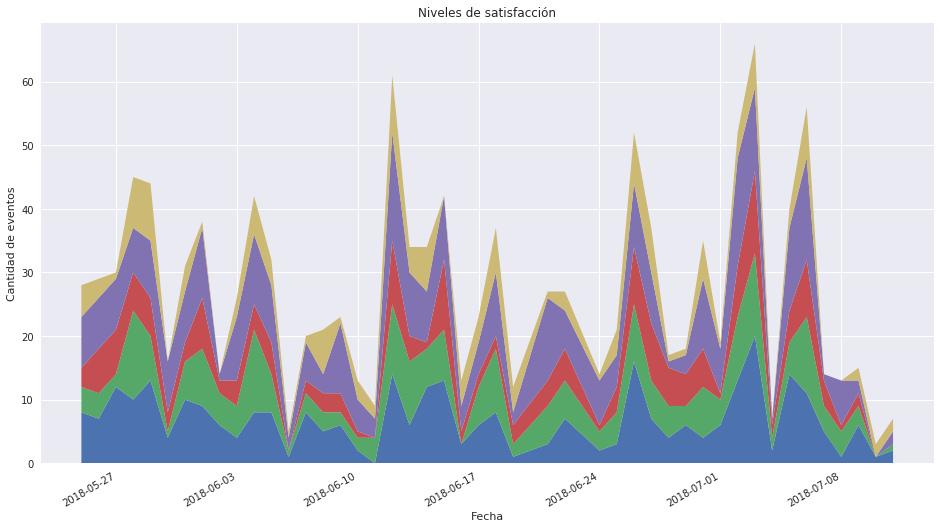

In [6]:
# plot data
#
dataf = week_df.query(' device == "desktop" & site == "MLA" & screenName == "shippingAgencyShippingStepshippingAgenciesMap" ')
dataf = dataf.groupby(['day','satisfactionLevel']).count()['browser'].unstack().fillna(0).reset_index()

dataf = dataf.rename(columns = {
    0  : 'sl0',
    1  : 'sl1',
    2  : 'sl2',
    3  : 'sl3',
    4  : 'sl4',
})

(fig, ax) = plt.subplots(figsize=(16,9))
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de eventos')
ax.stackplot(
    dataf['day'].values, 
    dataf['sl0'].values, 
    dataf['sl1'].values,
    dataf['sl2'].values, 
    dataf['sl3'].values, 
    dataf['sl4'].values  
)

fig.autofmt_xdate() #plt.xticks(x, labels, rotation='vertical')

plt.legend(loc='upper right')
plt.title('Niveles de satisfacción')
plt.show()

satisfaction,day,not_satisfied,satisfied
0,2018-05-25,15,13
1,2018-05-26,18,11
2,2018-05-27,21,9
3,2018-05-28,30,15
4,2018-05-29,26,18


No handles with labels found to put in legend.


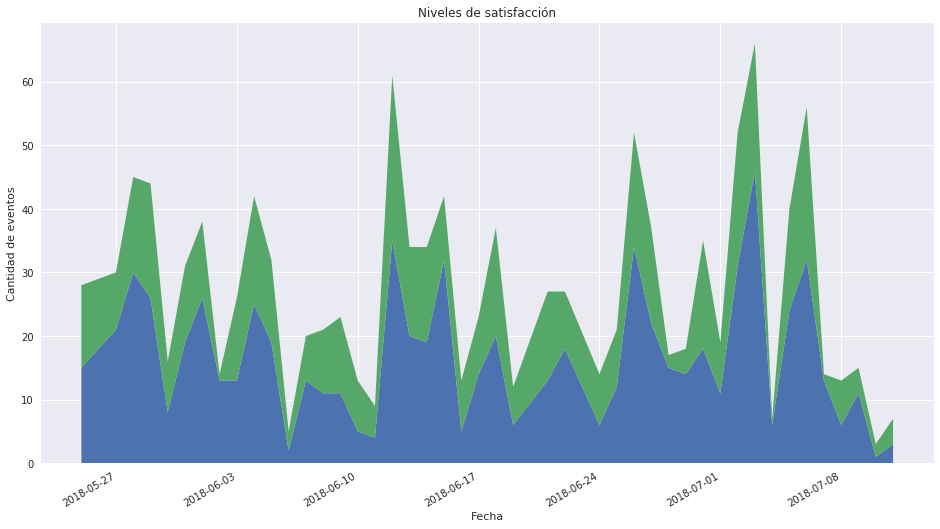

In [7]:
# plot data
#
dataf = week_df.query(' device == "desktop" & site == "MLA" & screenName == "shippingAgencyShippingStepshippingAgenciesMap" ')
dataf = dataf.groupby(['day','satisfaction']).count()['browser'].unstack().fillna(0).reset_index()

display( dataf.head() )

(fig, ax) = plt.subplots(figsize=(16,9))

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de eventos')

ax.stackplot(
    dataf['day'].values, 
    dataf['not_satisfied'].values, 
    dataf['satisfied'].values,
)

fig.autofmt_xdate() #plt.xticks(x, labels, rotation='vertical')

plt.legend(loc='upper right')
plt.title('Niveles de satisfacción')
plt.show()

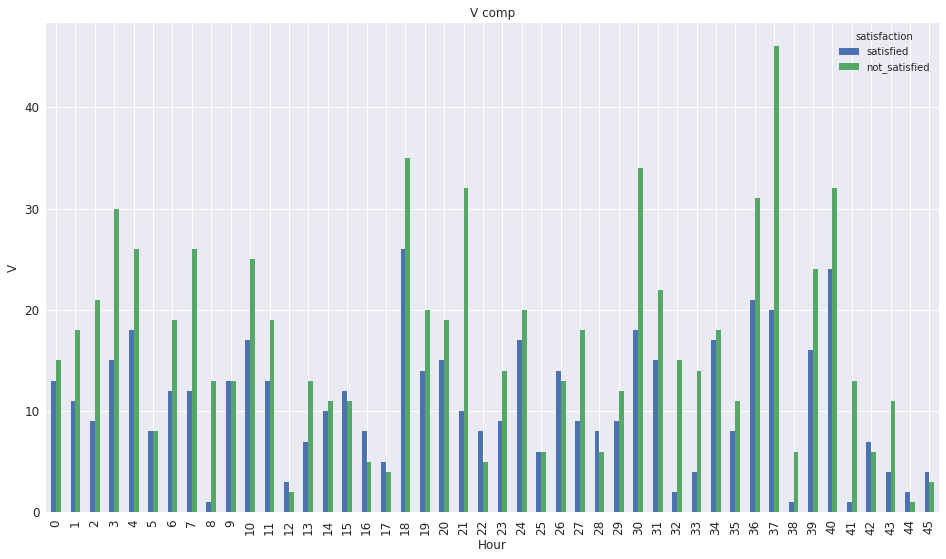

In [8]:
ax = dataf[['satisfied','not_satisfied']].plot(
    kind='bar', 
    title ="V comp", 
    figsize=(16,9), 
    legend=True, 
    fontsize=12
)

ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

poly1d([-5.37144942e-02,  3.95968393e+04])

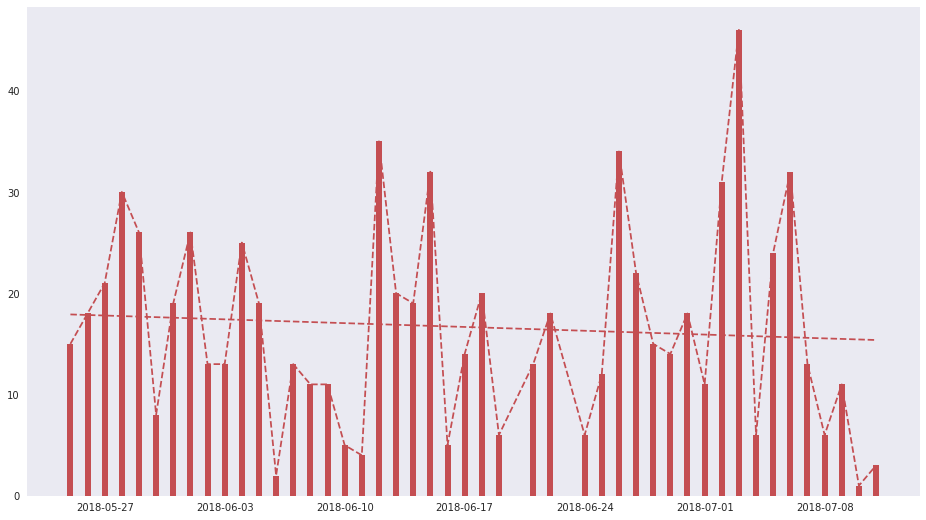

In [9]:
# plot grouped bar chart
import matplotlib.dates as mdates

dates = dataf['day'].values
x     = mdates.date2num( dates )
y     = dataf['not_satisfied'].values
xx    = np.linspace(x.min(), x.max(), 100)
dd    = mdates.num2date(xx)

z1 = np.polyfit(x, y, 1)
f1 = np.poly1d(z1)

display( f1 )

fig, cx = plt.subplots(figsize=(16,9))

cx.plot(dd, f1(xx), '--r')
cx.plot(dates, y, '--', color='r', label='blub')
cx.bar(dates, y, 0.35, color='r')


cx.grid()
#cx.set_ylim(0, 0.03)
plt.show()

poly1d([-5.62168105e-02,  4.14348324e+04])

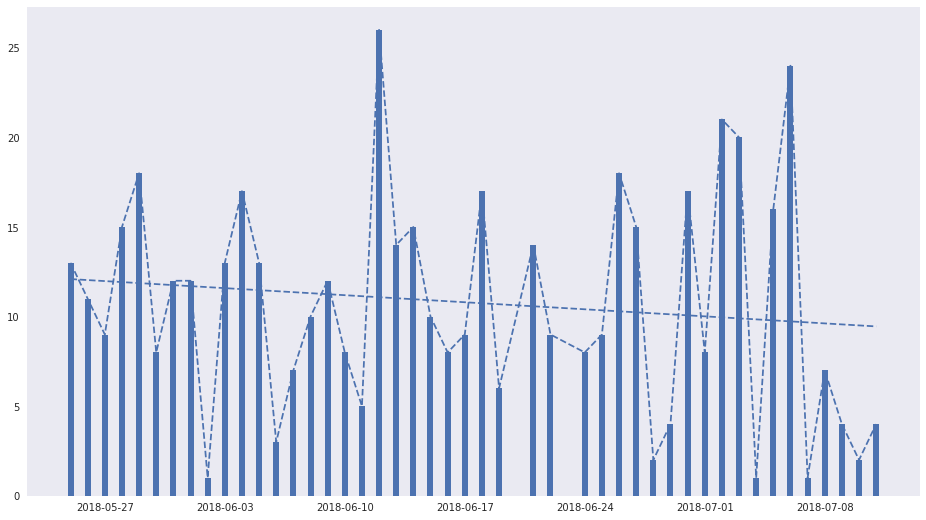

In [11]:
# plot grouped bar chart
import matplotlib.dates as mdates

dates = dataf['day'].values
x     = mdates.date2num( dates )
y     = dataf['satisfied'].values
xx    = np.linspace(x.min(), x.max(), 100)
dd    = mdates.num2date(xx)

z1 = np.polyfit(x, y, 1)
f1 = np.poly1d(z1)

display( f1 )

fig, cx = plt.subplots(figsize=(16,9))

cx.plot(dd, f1(xx), '--b')
cx.plot(dates, y, '--', color='b', label='blub')
cx.bar(dates, y, 0.35, color='b')


cx.grid()
#cx.set_ylim(0, 0.03)
plt.show()